# Mathematical Underpinnings - Lab 4

In [1]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde, pearsonr
from sklearn.feature_selection import mutual_info_classif
import seaborn as sns
import pandas as pd

## Task 1

### a)

#### bp 1)

In [2]:
# a heatmap
# you may use pcolormesh function and draw a heatmap for a sample
# or draw a heatmap for a teoretic density function

# I give you an answer to that task, because it may take too much time to do it during labs. 

In [3]:
def plot_xyz(data_2d, nbins=300):
    x = data_2d[:,0]
    y = data_2d[:,1]
    k = gaussian_kde([x, y])
    xi, yi = np.mgrid[x.min():x.max():nbins*1j, y.min():y.max():nbins*1j]
    zi = k(np.vstack([xi.flatten(), yi.flatten()]))
    return xi, yi, zi

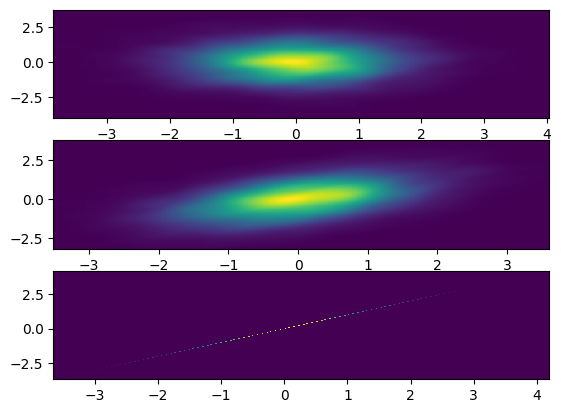

In [8]:
fig, axs = plt.subplots(3)

n = 5000

data_2d = np.random.multivariate_normal(np.zeros(2), np.array([[1, 0], [0, 1]]), n)
xi_0, yi_0, zi_0 = plot_xyz(data_2d)
data_2d = np.random.multivariate_normal(np.zeros(2), np.array([[1, 0.5], [0.5, 1]]), n)
xi_1, yi_1, zi_1 = plot_xyz(data_2d)
data_2d = np.random.multivariate_normal(np.zeros(2), np.array([[1, 1], [1, 1]]), n)
xi_2, yi_2, zi_2 = plot_xyz(data_2d)
 
# Make the plot
axs[0].pcolormesh(xi_0, yi_0, zi_0.reshape(xi_0.shape), shading='auto')
axs[1].pcolormesh(xi_1, yi_1, zi_1.reshape(xi_1.shape), shading='auto')
axs[2].pcolormesh(xi_2, yi_2, zi_2.reshape(xi_2.shape), shading='auto')
plt.show()

#### bp 2)

In [2]:
# pearsonr - Pearson correlation
# mutual_info_classif - MI (I haven't checked if it works correctly, but it seems to; 
#                           for sure sklearn.metrics.mutual_info_score doesn't do what we want)

In [4]:
def draw_data(ro, n=5000):
    return np.random.multivariate_normal(np.zeros(2), np.array([[1, ro], [ro, 1]]), n)

In [8]:
for ro in [0, 0.5, 1]:
    data = draw_data(ro)
    x_discrete = np.digitize(data[:, 0], 
                             bins=np.linspace(data[:, 0].min(), data[:, 0].max(), num=11)
                             )
    y_discrete = np.digitize(data[:, 1], 
                             bins=np.linspace(data[:, 1].min(), data[:, 1].max(), num=11)
                             )
    p = pearsonr(data[:,0], data[:,1]).statistic
    mi = mutual_info_classif(np.array([x_discrete]).T, y_discrete)[0]
    print(f"Ro: {ro:2.2f}   Pearson: {p:2.2f}   MI: {mi:2.2f}")

Ro: 0.00   Pearson: -0.01   MI: 0.01
Ro: 0.50   Pearson: 0.49   MI: 0.13
Ro: 1.00   Pearson: 1.00   MI: 1.48


#### bp 3)

In [35]:
results = pd.DataFrame()
ro_list = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]

In [36]:
for ro in ro_list:
    pearson = []
    mi_vals = []
    
    for _ in range(100):
        data = draw_data(ro)
        x_discrete = np.digitize(data[:, 0],
                                 bins=np.linspace(data[:, 0].min(), data[:, 0].max(), num=11)
                                 )
        y_discrete = np.digitize(data[:, 1],
                                 bins=np.linspace(data[:, 1].min(), data[:, 1].max(), num=11)
                                 )
        p = pearsonr(data[:,0], data[:,1]).statistic
        mi = mutual_info_classif(np.array([x_discrete]).T, y_discrete)[0]

        results = pd.concat([
            results, 
            pd.DataFrame({
                'ro': ro,
                'pearson': p, 
                'mi': mi
            }, index=[0])
        ])

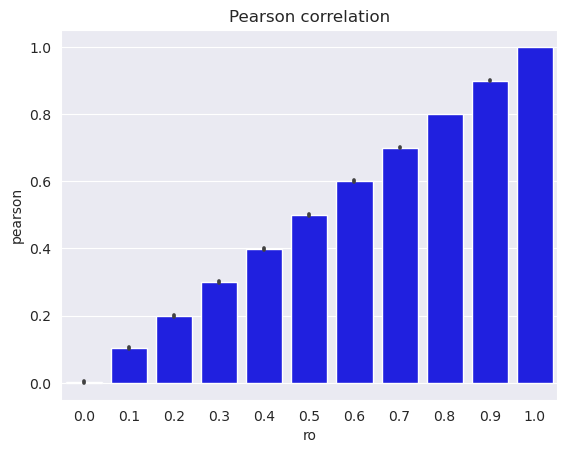

In [52]:
sns.barplot(data=results, x='ro', y='pearson', color='blue')
plt.title("Pearson correlation")
plt.show()

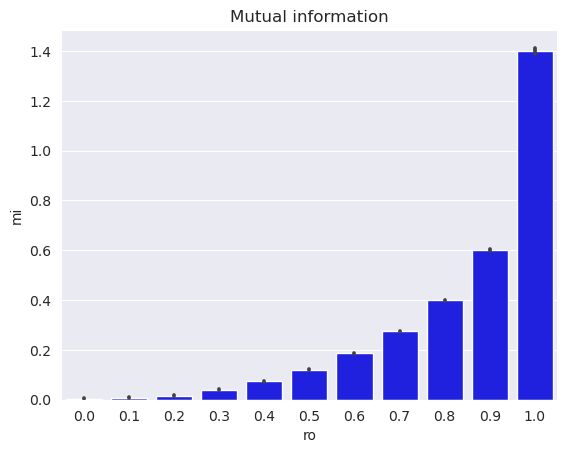

In [53]:
sns.barplot(data=results, x='ro', y='mi', color='blue')
plt.title("Mutual information")
plt.show()

#### bp 4)

A hint: note that mutual information between two correlated normal distributions i.e. when $(X, Y)\sim \mathcal{N}((0,0)', \Sigma)$ and
$$\Sigma = \begin{pmatrix}
        \sigma_x^2 & \rho \\ \rho & \sigma_y^2
    \end{pmatrix}$$
equals
$$I(X,Y) = \frac{1}{2}\log \left(\frac{\sigma_x^2\sigma_y^2}{\sigma_x^2\sigma_y^2 - \rho^2}\right).$$

In [54]:
df = results.copy()
df = df[np.logical_and(df.ro < 1,  df.ro > 0)]
df['mi_theory'] = -np.log(1 - df['ro']**2) / 2
df['mi_rho_estimate'] = -np.log(1 - df['pearson']**2) / 2

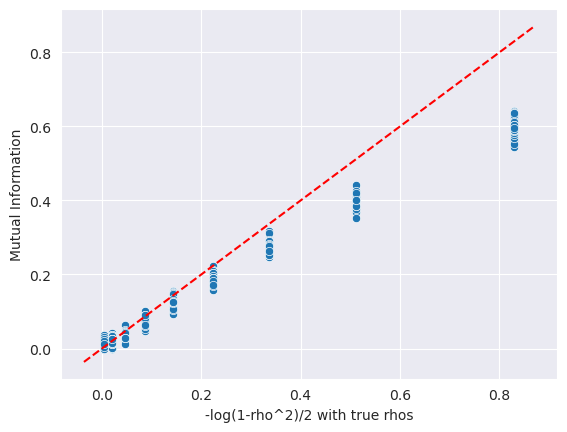

In [55]:
sns.scatterplot(data=df, x='mi_theory', y='mi')
plt.xlabel("-log(1-rho^2)/2 with true rhos")
plt.ylabel("Mutual Information")
x_lims = plt.xlim()
x_list = np.linspace(x_lims[0], x_lims[1], 100)
plt.plot(x_list, x_list, color='red', linestyle="--")
plt.show()

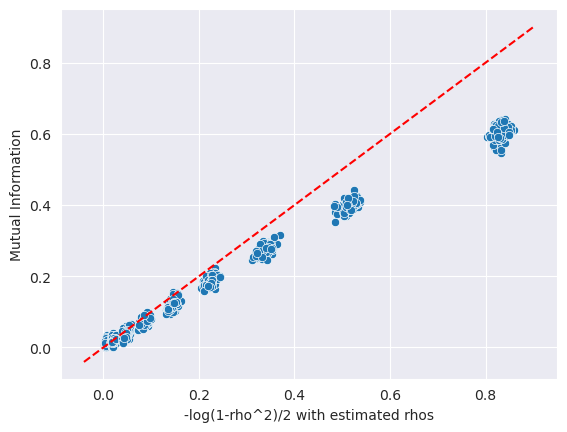

In [56]:
sns.scatterplot(data=df, x='mi_rho_estimate', y='mi')
plt.xlabel("-log(1-rho^2)/2 with estimated rhos")
plt.ylabel("Mutual Information")
x_lims = plt.xlim()
x_list = np.linspace(x_lims[0], x_lims[1], 100)
plt.plot(x_list, x_list, color='red', linestyle="--")
plt.show()

The relationships between the x and y in both plots are close to the identity relationship, however, it is not perfect. The differences are visible, especially fot the larger values.

### b)

#### bp 1)

In [57]:
# again: this is too time consuming so here is an answer

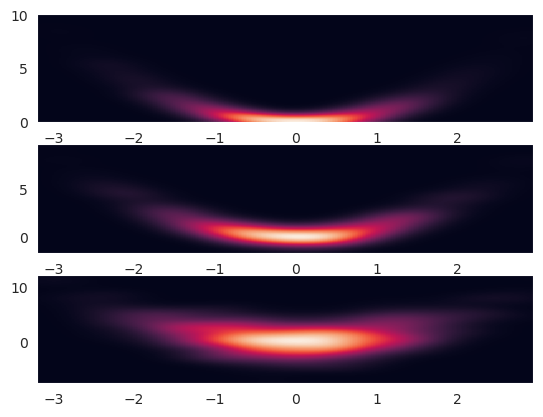

In [46]:
fig, axs = plt.subplots(3)

n = 1000
x = np.random.normal(0, 1, n)

data_2d = np.array([x, x**2 + np.random.normal(0, 0, n)]).T
xi_0, yi_0, zi_0 = plot_xyz(data_2d)
data_2d = np.array([x, x**2 + np.random.normal(0, 0.5, n)]).T
xi_1, yi_1, zi_1 = plot_xyz(data_2d)
data_2d = np.array([x, x**2 + np.random.normal(0, 2, n)]).T
xi_2, yi_2, zi_2 = plot_xyz(data_2d)
 
# Make the plot
axs[0].pcolormesh(xi_0, yi_0, zi_0.reshape(xi_0.shape), shading='auto')
axs[1].pcolormesh(xi_1, yi_1, zi_1.reshape(xi_1.shape), shading='auto')
axs[2].pcolormesh(xi_2, yi_2, zi_2.reshape(xi_2.shape), shading='auto')
plt.show()

#### bp 2) and 3)

In [58]:
def draw_data(ro, n=1000):
    x = np.random.normal(0, 1, n)
    return np.array([x, x**2 + np.random.normal(0, ro, n)]).T

In [60]:
for ro in [0, 0.5, 2]:
    data = draw_data(ro)
    x_discrete = np.digitize(data[:, 0],
                             bins=np.linspace(data[:, 0].min(), data[:, 0].max(), num=11)
                             )
    y_discrete = np.digitize(data[:, 1],
                             bins=np.linspace(data[:, 1].min(), data[:, 1].max(), num=11)
                             )
    p = pearsonr(data[:,0], data[:,1]).statistic
    mi = mutual_info_classif(np.array([x_discrete]).T, y_discrete)[0]
    print(f"Ro: {ro:2.2f}   Pearson: {p:2.2f}   MI: {mi:2.2f}")

Ro: 0.00   Pearson: -0.07   MI: 0.52
Ro: 0.50   Pearson: 0.04   MI: 0.45
Ro: 2.00   Pearson: -0.02   MI: 0.07


In [61]:
results = pd.DataFrame()
ro_list = [0, 0.25, 0.5, 0.75, 1, 1.25, 1.5, 1.75, 2]

In [62]:
for ro in ro_list:
    pearson = []
    mi_vals = []

    for _ in range(100):
        data = draw_data(ro)
        x_discrete = np.digitize(data[:, 0],
                                 bins=np.linspace(data[:, 0].min(), data[:, 0].max(), num=11)
                                 )
        y_discrete = np.digitize(data[:, 1],
                                 bins=np.linspace(data[:, 1].min(), data[:, 1].max(), num=11)
                                 )
        p = pearsonr(data[:,0], data[:,1]).statistic
        mi = mutual_info_classif(np.array([x_discrete]).T, y_discrete)[0]

        results = pd.concat([
            results,
            pd.DataFrame({
                'ro': ro,
                'pearson': p,
                'mi': mi
            }, index=[0])
        ])

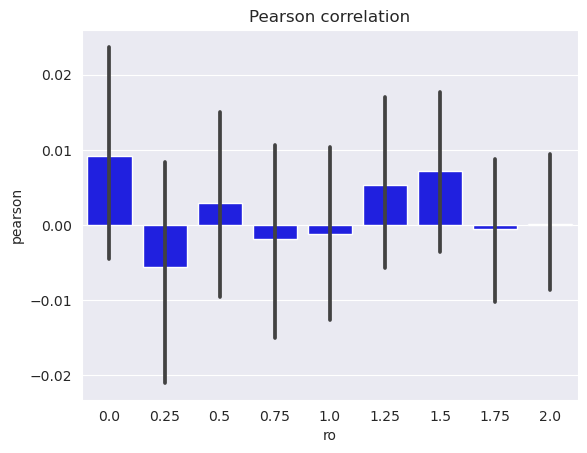

In [63]:
sns.barplot(data=results, x='ro', y='pearson', color='blue')
plt.title("Pearson correlation")
plt.show()

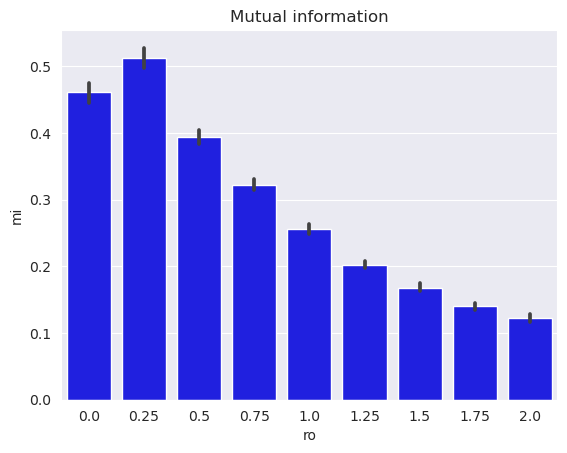

In [64]:
sns.barplot(data=results, x='ro', y='mi', color='blue')
plt.title("Mutual information")
plt.show()

## Task 2

### a)

In [76]:
def asymptotic_independence_test(x, y, stats = "mi", bins=10):
    stat_value = None
    
    if stats == "mi":
        x_discrete = np.digitize(x,
                                 bins=np.linspace(x.min(), x.max(), num=bins+1)
                                 )
        y_discrete = np.digitize(y,
                                 bins=np.linspace(y.min(), y.max(), num=bins+1)
                                 )
        
        mi = mutual_info_classif(np.array([x_discrete]).T, y_discrete)[0]
        stat_value = 2 * n * mi
        
    elif stats == "chi2":
        contingency = np.histogram2d(x, y, bins=bins)[0]
        stat_value = chi2_contingency(contingency)[0]

    p_value = chi2.sf(stat_value, (bins - 1) ** 2)
    return stat_value, p_value

### b)

In [77]:
def permutation_independence_test(x, y, B=100, bins=10):
    x_discrete = np.digitize(x,
                             bins=np.linspace(x.min(), x.max(), num=bins+1)
                             )
    y_discrete = np.digitize(y,
                             bins=np.linspace(y.min(), y.max(), num=bins+1)
                             )

    mi = mutual_info_classif(np.array([x_discrete]).T, y_discrete)[0]

    mi_values = np.zeros(B)
    for i in range(B):
        x_B = np.random.permutation(x)
        x_B_discrete = np.digitize(x_B,
                                   bins=np.linspace(x_B.min(), x_B.max(), num=bins+1)
                                   )

        mi_values[i] = mutual_info_classif(np.array([x_B_discrete]).T, y_discrete)[0]

    p_value = (1 + np.sum(mi <= mi_values)) / (1 + B)

    return 2 * n * mi, p_value

### c)

**Independent r.v.**

A hint: two discretized independent normal random variables (or any two independent discrete r.v.)

In [78]:
# independent r.v. - we expect that our tests don't reject the null hypothesis

In [86]:
x = np.random.normal(0, 1, 1000)
y = np.random.exponential(1, 1000)

In [87]:
print("Asymptotic MI independence test")
res = asymptotic_independence_test(x, y, stats="mi")
print(res)
print("Result: ", "Reject" if res[1] < 0.05 else "Don't reject")
print("")

print("Asymptotic chi2 independence test")
res = asymptotic_independence_test(x, y, stats="chi2")
print(res)
print("Result: ", "Reject" if res[1] < 0.05 else "Don't reject")
print("")

print("Permutation independence test")
res = permutation_independence_test(x, y)
print(res)
print("Result: ", "Reject" if res[1] < 0.05 else "Don't reject")
print("")

Asymptotic MI independence test
(70.3903552937799, 0.7938992155306853)
Result:  Don't reject

Asymptotic chi2 independence test
(68.041118425355, 0.8473205632223352)
Result:  Don't reject

Permutation independence test
(27.28280908202585, 0.32673267326732675)
Result:  Don't reject


**Dependent r.v.**

A hint: two discretized dependent normal random variables (or two categorical wuch that we enforce $X=Y$ for a subset of observations)

In [81]:
# independent r.v. - ideally we will reject the null hypothesis

In [82]:
data = draw_data(0.75, 1000)
x = data[:, 0]
y = data[:, 1]

In [83]:
print("Asymptotic MI independence test")
res = asymptotic_independence_test(x, y, stats="mi")
print(res)
print("Result: ", "Reject" if res[1] < 0.05 else "Don't reject")
print("")

print("Asymptotic chi2 independence test")
res = asymptotic_independence_test(x, y, stats="chi2")
print(res)
print("Result: ", "Reject" if res[1] < 0.05 else "Don't reject")
print("")

print("Permutation independence test")
res = permutation_independence_test(x, y)
print(res)
print("Result: ", "Reject" if res[1] < 0.05 else "Don't reject")
print("")

Asymptotic MI independence test
(704.6891530997801, 3.3583159339919945e-100)
Result:  Reject

Asymptotic chi2 independence test
(2098.856445535542, 0.0)
Result:  Reject

Permutation independence test
(714.0673846641703, 0.009900990099009901)
Result:  Reject
